      Enrollment Date  Age  Gender  Weight Economic Status Education  \
0               44185   14    Male      30       Destitute       Yes   
1               44190   18    Male      47      Struggling       Yes   
2               44183    6  Female      13       Destitute        No   
3               44181    9    Male      20      Struggling        No   
4               44735   14    Male      30      Struggling       Yes   
...               ...  ...     ...     ...             ...       ...   
1995            44909   10  Female      35   Ready to Grow       Yes   
1996            44909   34  Female      46      Struggling       NaN   
1997            44909   11    Male      27      Struggling       NaN   
1998            44935   16    Male      48      Struggling        No   
1999            44908   16  Female      46   Ready to Grow       Yes   

     Date of ART initiation Last Viral Load Date  Years on ART  \
0                10/24/2019           11/21/2022             3   
1  

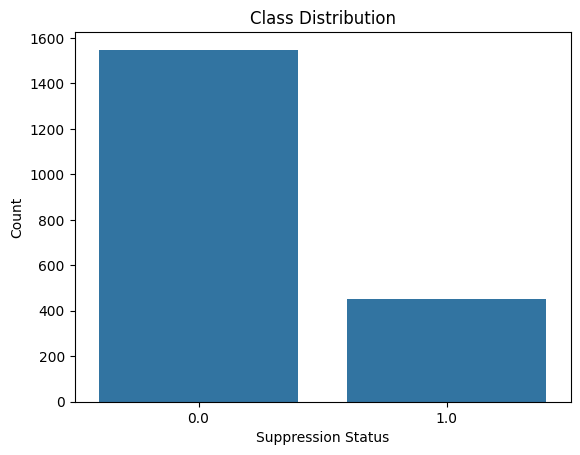

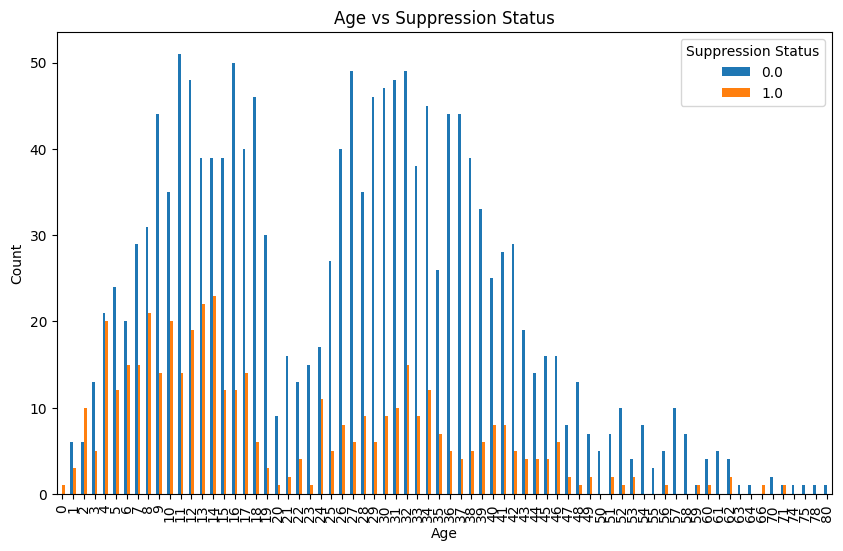

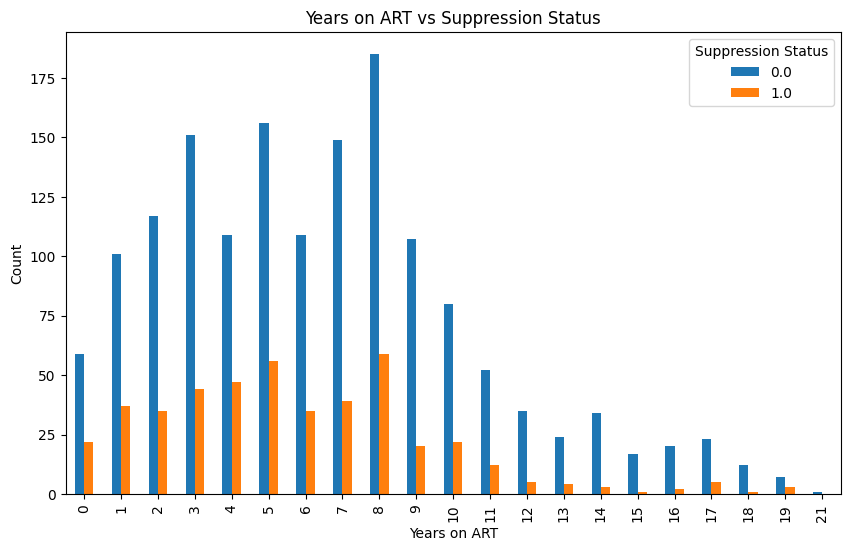

C:\Users\digital world\AppData\Local\Temp\ipykernel_17044\1145640411.py:78: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.Paired)


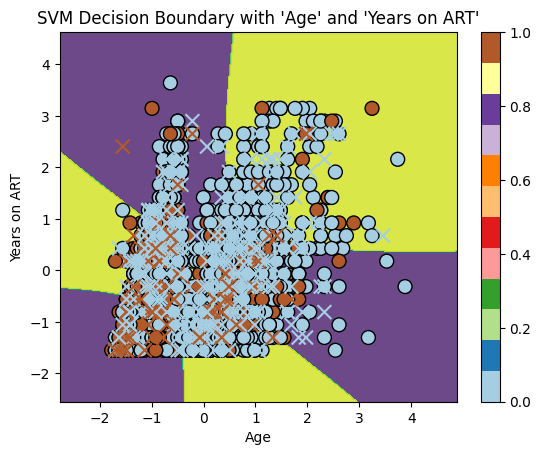

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset
data = pd.read_csv('Data/Clean_Dataset.csv', nrows = 2000)
print(data)


#Data Distribution
# Count of each class in the target variable
print(data['Suppression Status'].value_counts())

# Plot class distribution
sns.countplot(x='Suppression Status', data=data)
plt.title('Class Distribution')
plt.xlabel('Suppression Status')
plt.ylabel('Count')
plt.show()

# Relationship between weight and suppression status
pd.crosstab(data['Age'], data['Suppression Status']).plot(kind='bar', figsize=(10, 6))
plt.title('Age vs Suppression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relationship between weight and suppression status
pd.crosstab(data['Years on ART'], data['Suppression Status']).plot(kind='bar', figsize=(10, 6))
plt.title('Years on ART vs Suppression Status')
plt.xlabel('Years on ART')
plt.ylabel('Count')
plt.show()

# Choosing Age and Years on ART as the features
X = data[['Age', 'Years on ART']]
y = data['Suppression Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the SVM classifier with an sigmoid kernel
svm_model = SVC(kernel='sigmoid', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Create a meshgrid to plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)

# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, cmap=plt.cm.Paired)

plt.title("SVM Decision Boundary with 'Age' and 'Years on ART'")
plt.xlabel('Age')
plt.ylabel('Years on ART')
plt.colorbar()
plt.show()

In [2]:
print(X_test)
y_pred = svm_model.predict(X_test)
print("Predictions made", y_pred)

[[ 1.05649619e+00 -8.09155013e-01]
 [-1.06143803e+00  1.16929468e+00]
 [ 6.32909344e-01 -1.05646123e+00]
 [-1.69681830e+00 -1.55107365e+00]
 [ 7.74104959e-01  1.41660090e+00]
 [ 1.48008303e+00  2.15851953e+00]
 [-1.06143803e+00  9.21988472e-01]
 [ 1.90366988e+00 -8.09155013e-01]
 [-4.26057768e-01  2.15851953e+00]
 [-1.06143803e+00  4.27376048e-01]
 [ 2.09322499e-01 -1.55107365e+00]
 [-5.67253383e-01  1.80069836e-01]
 [-2.14264346e-01  2.90043817e+00]
 [-8.49644613e-01  4.27376048e-01]
 [-4.96655575e-01 -6.72363764e-02]
 [ 1.69187646e+00 -1.05646123e+00]
 [-1.34382926e+00 -1.30376744e+00]
 [-1.13203584e+00  1.80069836e-01]
 [-1.20263365e+00 -6.72363764e-02]
 [ 5.62311536e-01 -8.09155013e-01]
 [ 5.62311536e-01 -3.14542589e-01]
 [-4.96655575e-01 -8.09155013e-01]
 [-5.67253383e-01  1.80069836e-01]
 [ 6.32909344e-01  9.21988472e-01]
 [-2.47092326e-03 -1.05646123e+00]
 [ 5.62311536e-01  6.74682260e-01]
 [ 4.21115921e-01 -5.61848801e-01]
 [-1.48502488e+00 -8.09155013e-01]
 [-2.14264346e-01 -3

In [3]:
new_data = [[27, 3]] 

# Example: Age = 70, Years on ART = 3

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make the prediction
new_prediction = svm_model.predict(new_data_scaled)


print("Prediction for the new data:", new_prediction)

Prediction for the new data: [1.]


C:\Users\digital world\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
#Model Evaluation
# Prediction using the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 49.75%
